# The Sparks Foundation- GRIP- Data Science and Business Analytics- JAN,2022

# TASK 1: Prediction Using Supervised ML

## Author:Snehal Patil

## Problem Statement

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [2]:
df=pd.read_csv("Task-1.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

###### Step2 - Scatter Plot for Hours Vs Percentage

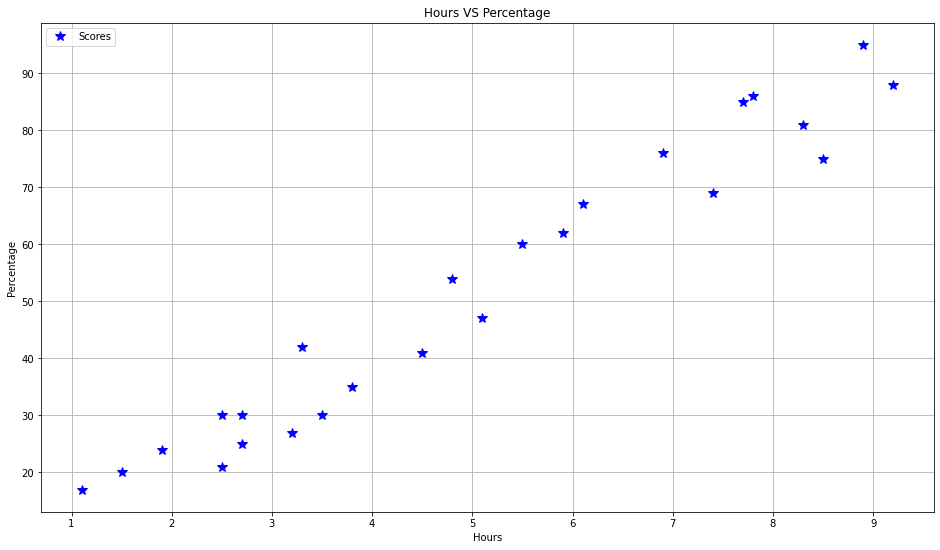

In [10]:
#Plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x="Hours", y="Scores", style="*", color="Blue", markersize=10)
plt.title("Hours VS Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.grid()
plt.show()

In [18]:
#we can also find correlation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [19]:
#data preparation in this step we will duivide into "features" &"labels". After the whole dataset is been divided into parts-testing & training data

In [20]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Data Prepocessing

In [14]:
#using iloc function we can divide the dataset
x=df.iloc[:,:-1]
y=df.iloc[:,1:]
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
#now lets split the data into training & testing data
#this random state is used to pick up the values randomly from a data set

In [17]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
#training the algorithm
#through sklearn lib we will store linear regression into model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
#step 5 : Visualizaing the data model
line= model.coef_*x + model.intercept_

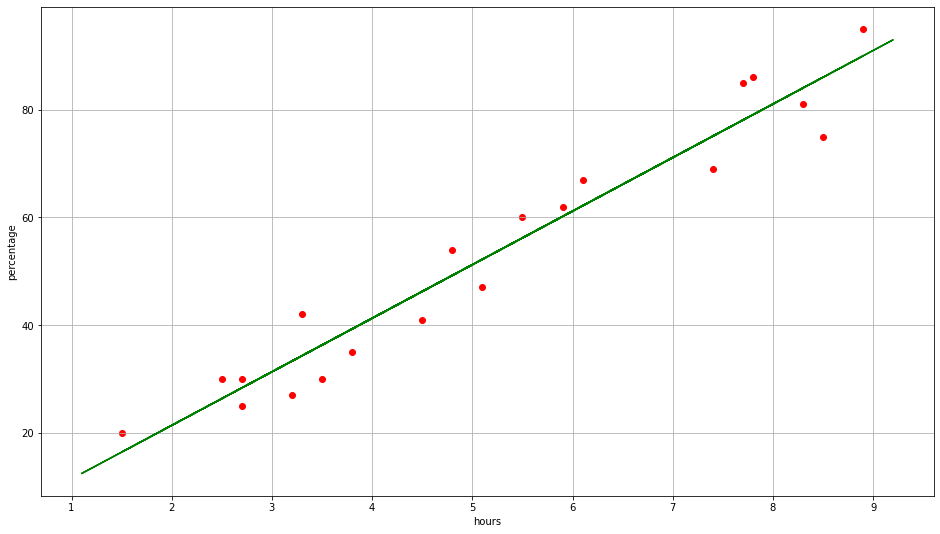

In [22]:
#plotting for the training data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_train,y_train,color="red")
plt.plot(x,line,color="green")
plt.xlabel("hours")
plt.ylabel("percentage")
plt.grid()
plt.show()

#### now lets fit the above bestfit line in the test dataset which give us quite good predictions

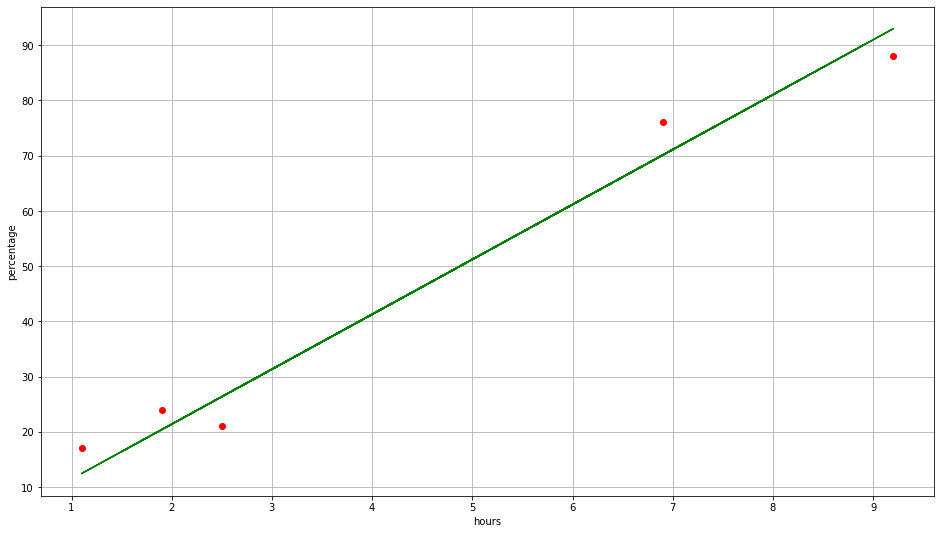

In [23]:
line=model.coef_*x + model.intercept_
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_test,y_test,color="red")
plt.plot(x,line,color="green")
plt.xlabel("hours")
plt.ylabel("percentage")
plt.grid()
plt.show()

In [24]:
#Step6 : Making predictions(Testing data in hours, prdicting the scores)
#For this we use .predict method & apply it on x_test
print(x_test)
y_pred= model.predict(x_test)

    Hours
14    1.1
0     2.5
17    1.9
6     9.2
23    6.9


In [25]:
#comparing actual VS predicted
y_test

,Scores
14,17
0,21
17,24
6,88
23,76


In [26]:
y_pred

array([[12.44258714],
       [26.35944834],
       [20.39507925],
       [92.9615698 ],
       [70.09815497]])

In [27]:
comp=pd.DataFrame({"Actial":[y_test],"Predicted":[y_pred]})
comp

,Actial,Predicted
0,Scores 14 17 0 21 17 24 6 ...,"[[12.442587140279223], [26.359448340673122], [..."


In [28]:
#test with own data
hours=9.25
own_pred=model.predict([[hours]])
print("The predicted score if the student studies for",hours,"hours is",own_pred[0])

The predicted score if the student studies for 9.25 hours is [93.45860056]


In [29]:
#Evaluating the Model
from sklearn import metrics
print("Mean absoute error:", metrics.mean_absolute_error(y_test,y_pred))

Mean absoute error: 4.877039354964484


In [30]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
rmse

4.938382360637607

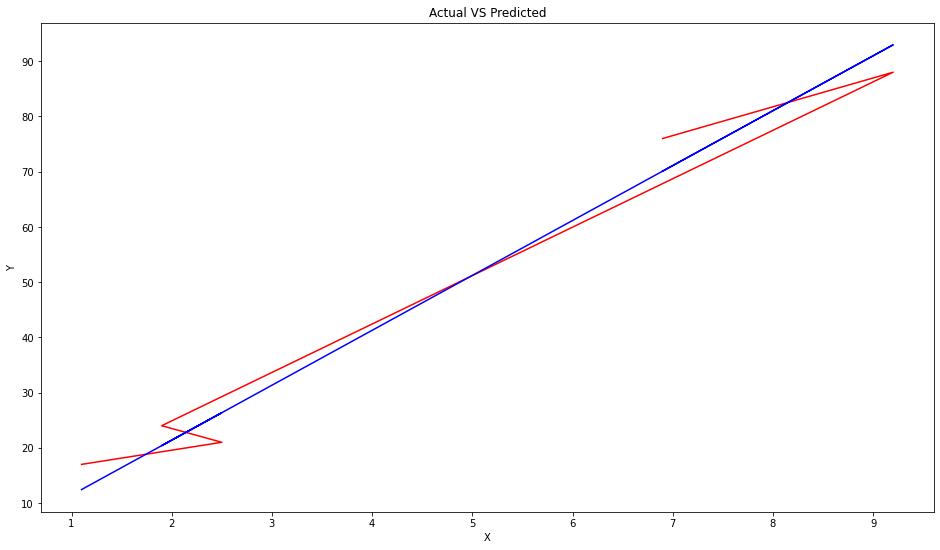

In [33]:
plt.plot(x_test,y_test,color="red")
plt.plot(x_test,model.predict(x_test), color="blue")
plt.title("Actual VS Predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [32]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25
